# Mengenal MongoDB

link download mongoDB : https://www.mongodb.com/try/download/community

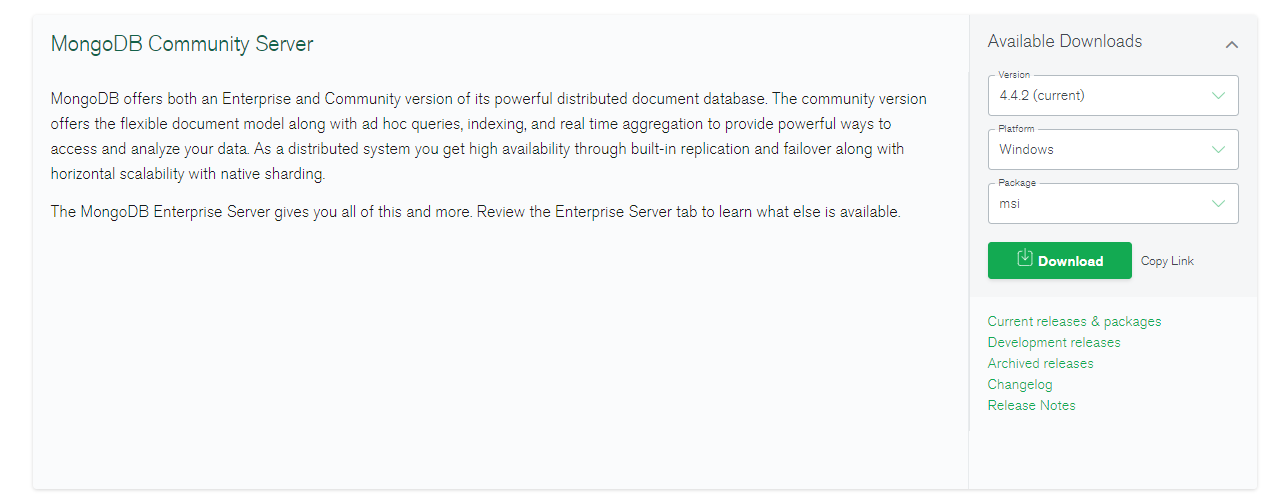

In [3]:
from IPython.display import Image
Image(filename='presentasi-magang/download_mongodb.png')

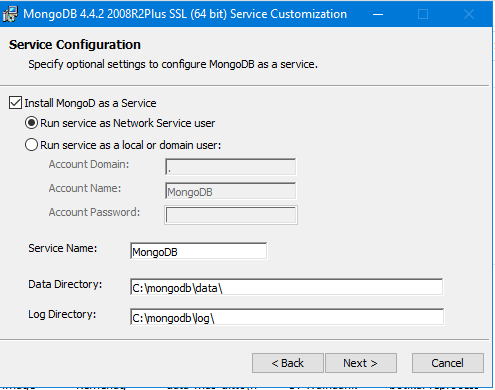

In [8]:
Image(filename='presentasi-magang/install.png')

## Mengkoneksikan Python dengan MongoDB

In [9]:
#package yang di butuhkan
from pymongo import MongoClient

In [10]:
#local
client = MongoClient('localhost' , 27017)
db = client.presentasi

## Mengoneksikan MongoDB Compas

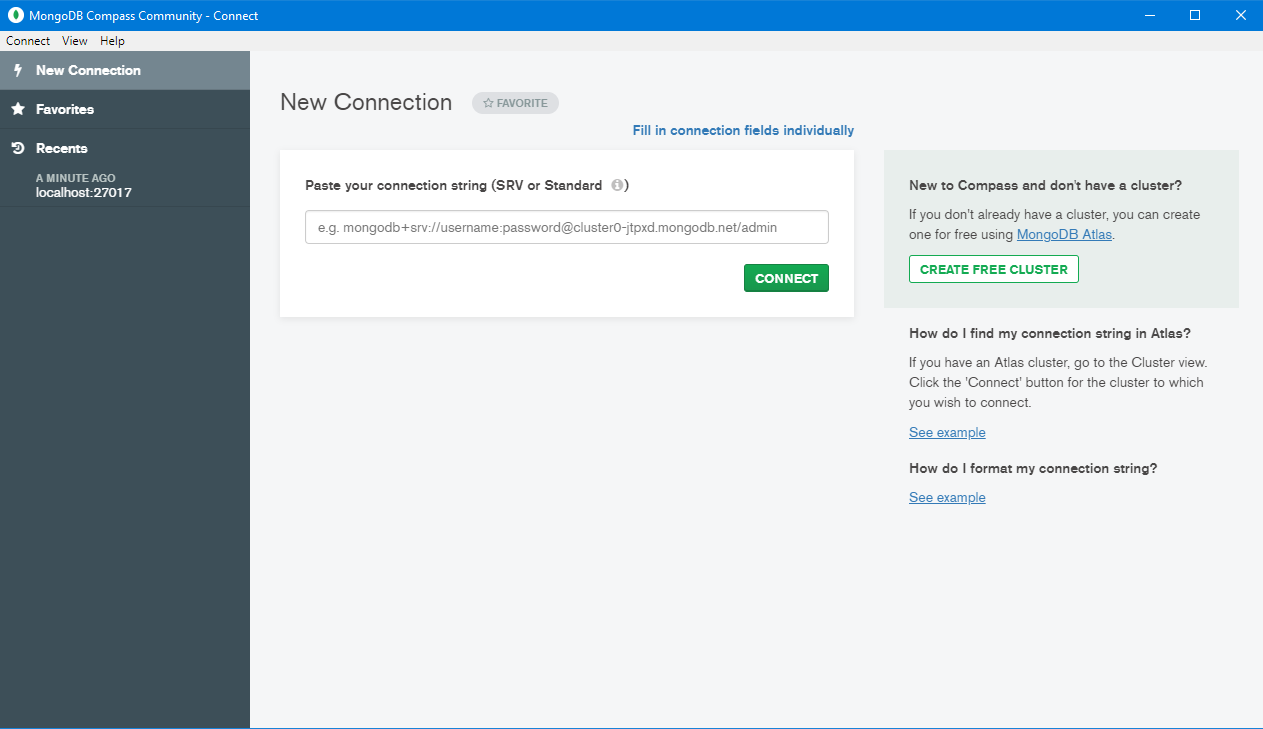

In [15]:
Image(filename='presentasi-magang/konek-dblocal.png')

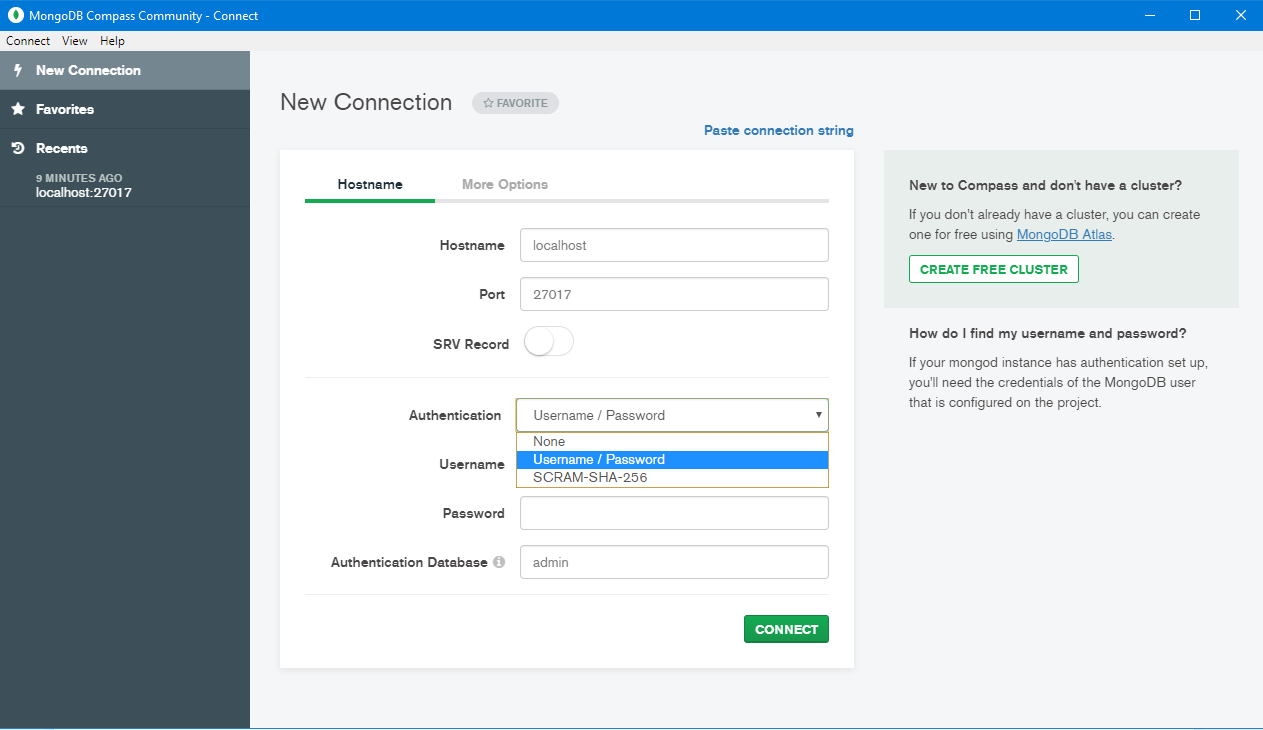

In [16]:
Image(filename='presentasi-magang/konek-dbserver.png')

## Create Database

Create DB :
1. Membuat secara otomatis : dengan melakukan insert/import data
2. Membuat secara manual (di dalam prompt mongoDB)
   
   tahap pembuatan :
       a. membuat database >> "create db <nama db>"
       b. membuat collections/nama tabel >> "create collection <nama collection>"

NB :
- untuk melihat db yang kita punya >> "show dbs"
- untuk melihat collection yg kita punya >> "show collections"

## Import DB

1. import melalui command prompt
        mongoimport --type csv -d presentasi -c tabel1 --headerline --file E:\magang\presentasi-magang\data-insert.csv
        mongoimport --type json -d presentasi -c tabel2 --file E:\magang\presentasi-magang\data-intent.json

2. import melalui python 

In [12]:
import csv
with open('presentasi-magang/data-insert1.csv', 'r') as csvfile:
    header = [ "id", "text", "label"]
    reader = csv.reader(csvfile)

    for row in reader:
        doc={}
        for n in range(0,len(header)):
            doc[header[n]] = row[n]

        db.tabel3.insert(doc)

E:\nilam titip\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  # This is added back by InteractiveShellApp.init_path()


3. melalui mongoDB compas

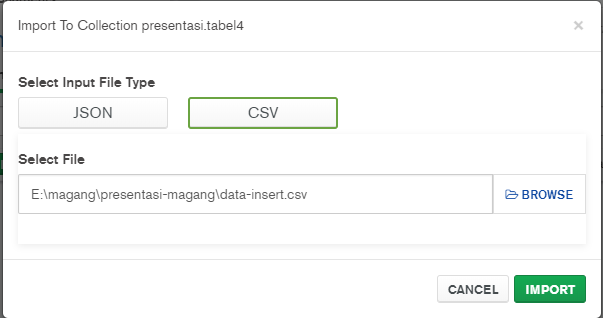

In [17]:
Image(filename='presentasi-magang/import-mongocompas.png')

## Insert Database

menggunakan fungsi >> db.collection.insert( )

In [19]:
ins_1 = {"id" : "50", "text" : "hai botika, nama saya agung dari jogja", "label" : "sys.ask_introduction"}
ins_2 = [
    {"id" : "51", "text" : "lokasi kamu dimana sih", "label" : "sys.ask_location"},
    {"id" : "52", "text" : "sedih banget tahu klo gt", "label" : "sys.info_feeling_sad"}
]

In [20]:
db.tabel5.insert_one(ins_1)

In [21]:
db.tabel5.insert(ins_2)

E:\nilam titip\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  """Entry point for launching an IPython kernel.


[ObjectId('5fe220c78070b792b06e88aa'), ObjectId('5fe220c78070b792b06e88ab')]

In [70]:
db.tabel6.insert_one(
    {"id": 1,
     "text": "hai botika, nama saya agung dari jogja",
     "output": {"label": "sys.ask_introduction", "probab": 0.9867}})

## Find Database

menggunakan fungsi >> db.collection.find( )

In [23]:
db.tabel1.find()

In [28]:
db.tabel2.find_one()

{'_id': ObjectId('5fe215f7ce500750c52d438f'),
 'id': 2,
 'text': 'Jogja-malang',
 'label': 'sys.info_greeting'}

In [71]:
db.tabel6.find_one({"id":1})

{'_id': ObjectId('5fe22a318070b792b06e88af'),
 'id': 1,
 'text': 'hai botika, nama saya agung dari jogja',
 'output': {'label': 'sys.ask_introduction', 'probab': 0.9867}}

In [51]:
cek = (
{"id": 1},
{"id": 2},
{"id": 3}
)
cek_1 = { "$or": cek}

In [56]:
print([x for x in db.tabel2.find(cek_1)])

[{'_id': ObjectId('5fe215f7ce500750c52d438f'), 'id': 2, 'text': 'Jogja-malang', 'label': 'sys.info_greeting'}, {'_id': ObjectId('5fe215f7ce500750c52d4391'), 'id': 3, 'text': 'Tiket kereta', 'label': 'sys.ask_purchase'}, {'_id': ObjectId('5fe215f7ce500750c52d4390'), 'id': 1, 'text': 'Tanggal 20 januari 2018', 'label': 'sys.info_datetime'}]


## Menghitung Jumlah Data

In [59]:
db.tabel6.find({'id':1}).count()

E:\nilam titip\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


2

## Menghapus Database

In [63]:
db.tabel2.delete_one({'id':49})

In [68]:
db.tabel6.drop()

## Export Database

1. import melalui command prompt
        mongoexport --collection tabel1 --db presentasi --out E:\magang\presentasi-magang\data-intent.json
        mongoexport --collection tabel2 --db presentasi --out E:\magang\presentasi-magang\export.csv
        mongoexport --db presentasi --collection tabel2 --type=csv --fields=id,text,label --out=E:\magang\presentasi-magang\export1.csv

2. import melalui python

In [103]:
find = db.tabel2.find()

In [104]:
with open('presentasi-magang/export3.csv', 'w') as outfile:
    fields = ['id', 'text', 'label']
    write = csv.DictWriter(outfile, fieldnames=fields)
    write.writeheader()
    for i in find :
        _id = i['_id']
        output_csv = {'id': i['id'], 'text': i['text'], 'label': i['label']}
        #print (output_csv)
        write.writerow(output_csv)

sumber : https://docs.mongodb.com/manual